In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)  # 0 and 1, where 0 = malignant / benign depending on dataset metadata
print("Feature names:", data.feature_names)
print("Target names:", data.target_names)
print("Shape of X:", X.shape)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target names: ['malignant' 'benign']
Shape of X: (569, 30)


In [ ]:
print(X.head())
print(X.info())
print(X.describe())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

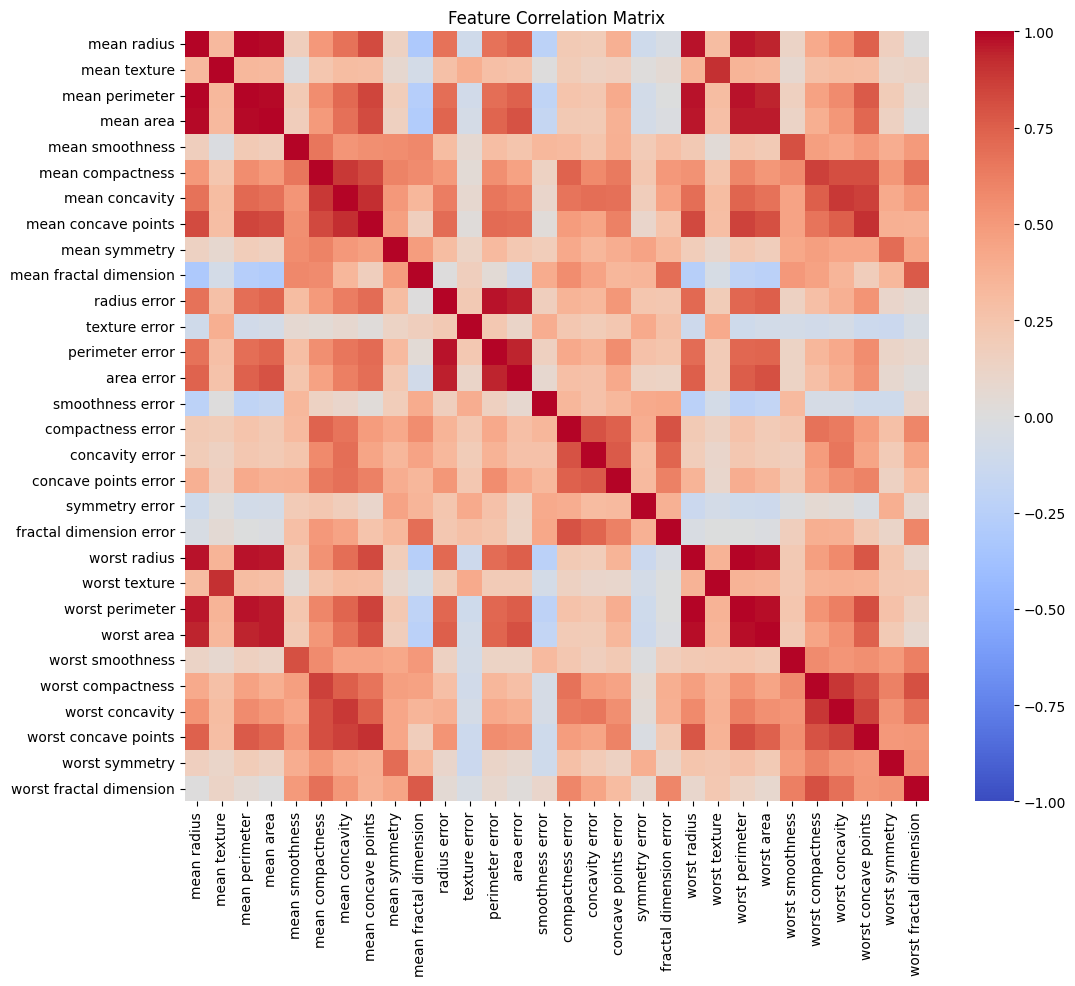

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', vmax=1.0, vmin=-1.0)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# 6A: Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# 6B: Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
print(classification_report(y_test,rf_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Assignment 6: Implement the same for Diabetes dataset available in Scikit learn library.

--- Data Exploration ---
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Target name: diabetes_target.csv.gz
Shape of X: (442, 10)

--- X.head() ---
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Generating feature correlation matrix...


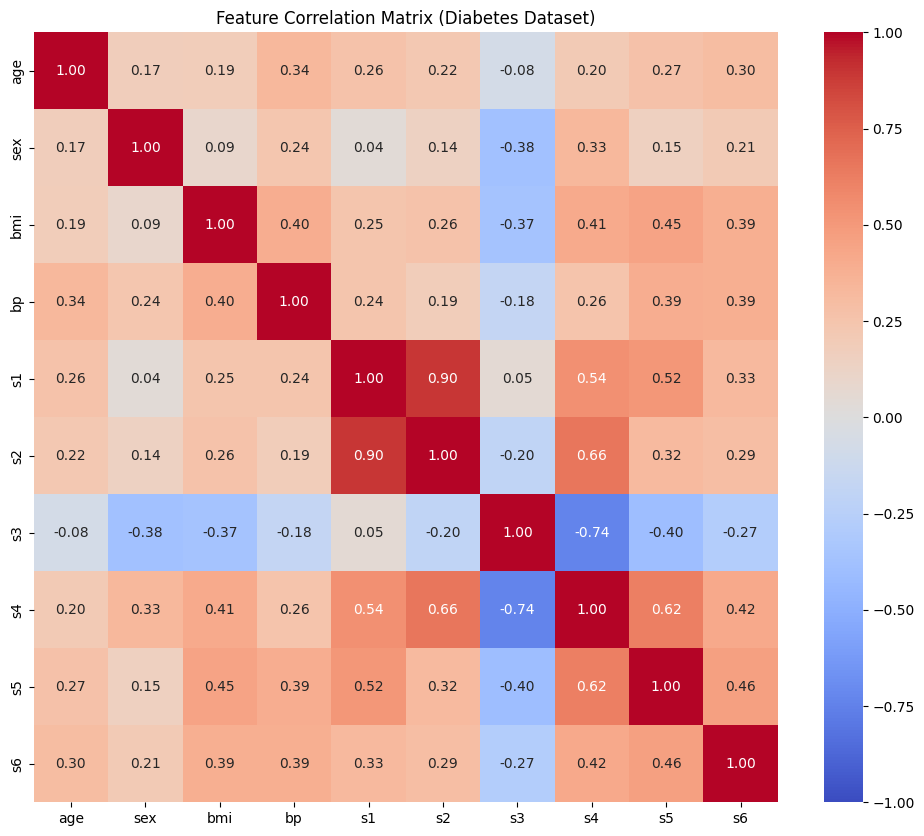


Data split into training and testing sets:
X_train shape: (353, 10)
X_test shape: (89, 10)

--- Training Decision Tree Regressor ---
Decision Tree Regressor trained.

--- Training Random Forest Regressor ---
Random Forest Regressor trained.

--- Decision Tree Regressor Evaluation ---
Mean Squared Error (MSE): 4897.15
R-squared (R2): 0.08

--- Random Forest Regressor Evaluation ---
Mean Squared Error (MSE): 2963.01
R-squared (R2): 0.44

--- Conclusion ---
Random Forest performed better (lower MSE).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

diabetes = load_diabetes()

X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target)

print("--- Data Exploration ---")
print("Feature names:", diabetes.feature_names)
print("Target name:", diabetes.target_filename)
print("Shape of X:", X.shape)
print("\n--- X.head() ---")
print(X.head())

print("\nGenerating feature correlation matrix...")
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap='coolwarm', vmax=1.0, vmin=-1.0, annot=True, fmt=".2f")
plt.title("Feature Correlation Matrix (Diabetes Dataset)")
plt.show()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42
)

print(f"\nData split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

print("\n--- Training Decision Tree Regressor ---")
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
print("Decision Tree Regressor trained.")

print("\n--- Training Random Forest Regressor ---")
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
print("Random Forest Regressor trained.")

dt_preds = dt_reg.predict(X_test)
rf_preds = rf_reg.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_preds)
dt_r2 = r2_score(y_test, dt_preds)

rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("\n--- Decision Tree Regressor Evaluation ---")
print(f"Mean Squared Error (MSE): {dt_mse:.2f}")
print(f"R-squared (R2): {dt_r2:.2f}")

print("\n--- Random Forest Regressor Evaluation ---")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"R-squared (R2): {rf_r2:.2f}")

print("\n--- Conclusion ---")
if rf_mse < dt_mse:
    print("Random Forest performed better (lower MSE).")
else:
    print("Decision Tree performed better (lower MSE).")